# About

On this notebook we setup the last and complete steps for the pipeline.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Definitions

REGION = "BuenosAiresCityCenter"

In [3]:
from tqdm import tqdm
tqdm.pandas()

import tools
import settings

settings.CONSTANTS.DEFAULT_CELL_SIZE_METERS = 10

In [4]:
subset = tools.load_subset(REGION)
subset

Subset BuenosAiresCityCenter loaded with 7906 entries.


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON((-58.3726862870237 -34.6098345100679, ...",48Q39JRG+3WRP
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON((-58.3882617432414 -34.6033316833177, ...",48Q39JW6+MMGG
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON((-58.3834292 -34.6067809, -58.3834344 ...",48Q39JV8+8JM2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON((-58.379693575366 -34.6063442145165, -...",48Q39JVC+G359
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON((-58.3781694893224 -34.6026622967781, ...",48Q39JWC+XP33
...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON((-58.3782097 -34.6127214, -58.3782147 ...",48Q39JPC+WMG9
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON((-58.3879143732371 -34.5982830493679, ...",48Q3CJ26+PR64
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON((-58.3802248917167 -34.600861126517, -...",48Q39JX9+MV9Q
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON((-58.3890316865193 -34.6116508772852, ...",48Q39JQ6+9936


In [5]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33
...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936


<Axes: >

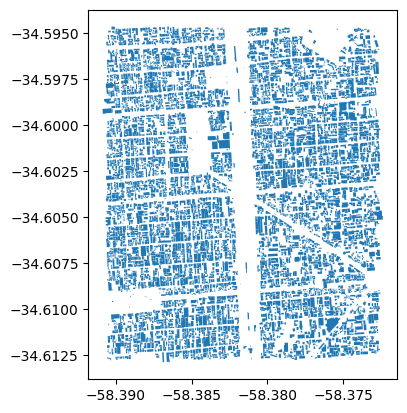

In [6]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [7]:
long_area_center, lat_area_center = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.381720192232144, -34.603834718819904


<Axes: >

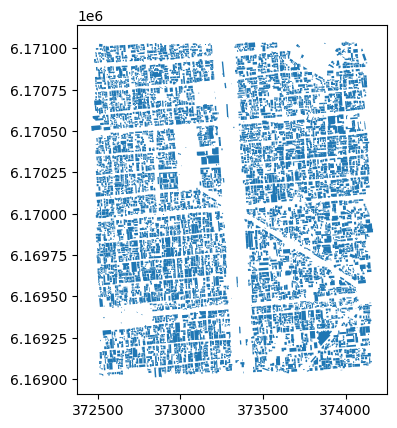

In [8]:
# Now we convert the representation system to UTM
subset = tools.convert_to_UTM(subset)
subset.plot()

In [9]:
area_center_x, area_center_y = tools.get_region_centroid(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.381720192232144, -34.603834718819904


In [10]:
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((372706.065 6170068.631, 372705.651 6...",48Q39JW6+MMGG,372703.379253,6.170071e+06
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((373154.453 6169692.199, 373153.766 6...",48Q39JV8+8JM2,373151.171421,6.169704e+06
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((373496.33 6169745.319, 373493.965 61...",48Q39JVC+G359,373490.574485,6.169757e+06
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((373630.504 6170155.556, 373630.17 61...",48Q39JWC+XP33,373627.138818,6.170160e+06
...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((373642.06 6169039.946, 373641.5 6169...",48Q39JPC+WMG9,373635.147381,6.169043e+06
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((372730.215 6170628.965, 372729.735 6...",48Q3CJ26+PR64,372724.011941,6.170635e+06
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((373439.291 6170352.73, 373438.875 61...",48Q39JX9+MV9Q,373436.241516,6.170356e+06
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((372648.167 6169145.054, 372647.896 6...",48Q39JQ6+9936,372642.868013,6.169149e+06


In [11]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y,relative_x,relative_y,x_cell,y_cell,size_in_cells
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06,833.104865,-645.496036,83,-65,1
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((372706.065 6170068.631, 372705.651 6...",48Q39JW6+MMGG,372703.379253,6.170071e+06,-603.303968,49.693105,-61,4,1
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((373154.453 6169692.199, 373153.766 6...",48Q39JV8+8JM2,373151.171421,6.169704e+06,-155.511799,-316.951743,-16,-32,2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((373496.33 6169745.319, 373493.965 61...",48Q39JVC+G359,373490.574485,6.169757e+06,183.891265,-264.411299,18,-27,2
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((373630.504 6170155.556, 373630.17 61...",48Q39JWC+XP33,373627.138818,6.170160e+06,320.455597,138.898341,32,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((373642.06 6169039.946, 373641.5 6169...",48Q39JPC+WMG9,373635.147381,6.169043e+06,328.464161,-977.926808,32,-98,1
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((372730.215 6170628.965, 372729.735 6...",48Q3CJ26+PR64,372724.011941,6.170635e+06,-582.671280,614.298237,-59,61,2
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((373439.291 6170352.73, 373438.875 61...",48Q39JX9+MV9Q,373436.241516,6.170356e+06,129.558295,334.745120,12,33,1
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((372648.167 6169145.054, 372647.896 6...",48Q39JQ6+9936,372642.868013,6.169149e+06,-663.815208,-872.513443,-67,-88,1


In [12]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 168/168 [00:02<00:00, 79.41it/s]


In [13]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 7906/7906 [00:04<00:00, 1623.43it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y,relative_x,relative_y,x_cell,y_cell,size_in_cells,overlapping
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06,833.104865,-645.496036,83,-65,1,"[{'x_cell': 82, 'y_cell': -66, 'area': 1.93978..."
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((372706.065 6170068.631, 372705.651 6...",48Q39JW6+MMGG,372703.379253,6.170071e+06,-603.303968,49.693105,-61,4,1,"[{'x_cell': -61, 'y_cell': 4, 'area': 13.41022..."
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((373154.453 6169692.199, 373153.766 6...",48Q39JV8+8JM2,373151.171421,6.169704e+06,-155.511799,-316.951743,-16,-32,2,"[{'x_cell': -17, 'y_cell': -33, 'area': 5.8444..."
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((373496.33 6169745.319, 373493.965 61...",48Q39JVC+G359,373490.574485,6.169757e+06,183.891265,-264.411299,18,-27,2,"[{'x_cell': 17, 'y_cell': -28, 'area': 0.14143..."
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((373630.504 6170155.556, 373630.17 61...",48Q39JWC+XP33,373627.138818,6.170160e+06,320.455597,138.898341,32,13,1,"[{'x_cell': 31, 'y_cell': 13, 'area': 15.37976..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((373642.06 6169039.946, 373641.5 6169...",48Q39JPC+WMG9,373635.147381,6.169043e+06,328.464161,-977.926808,32,-98,1,"[{'x_cell': 32, 'y_cell': -99, 'area': 14.7730..."
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((372730.215 6170628.965, 372729.735 6...",48Q3CJ26+PR64,372724.011941,6.170635e+06,-582.671280,614.298237,-59,61,2,"[{'x_cell': -60, 'y_cell': 61, 'area': 3.25795..."
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((373439.291 6170352.73, 373438.875 61...",48Q39JX9+MV9Q,373436.241516,6.170356e+06,129.558295,334.745120,12,33,1,"[{'x_cell': 12, 'y_cell': 33, 'area': 21.72417..."
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((372648.167 6169145.054, 372647.896 6...",48Q39JQ6+9936,372642.868013,6.169149e+06,-663.815208,-872.513443,-67,-88,1,"[{'x_cell': -67, 'y_cell': -88, 'area': 56.121..."


In [14]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [15]:
# Now we will add the orientation information for each building
subset = tools.add_building_orientation(subset)
subset

100%|██████████| 7906/7906 [00:01<00:00, 7142.15it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,coord_x,coord_y,relative_x,relative_y,x_cell,y_cell,size_in_cells,overlapping,orientation_angle,eccentricity
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((374144.139 6169367.011, 374143.205 6...",48Q39JRG+3WRP,374139.788086,6.169376e+06,833.104865,-645.496036,83,-65,1,"[{'x_cell': 82, 'y_cell': -66, 'area': 1.93978...",93.036766,0.897334
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((372706.065 6170068.631, 372705.651 6...",48Q39JW6+MMGG,372703.379253,6.170071e+06,-603.303968,49.693105,-61,4,1,"[{'x_cell': -61, 'y_cell': 4, 'area': 13.41022...",4.959344,0.281026
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((373154.453 6169692.199, 373153.766 6...",48Q39JV8+8JM2,373151.171421,6.169704e+06,-155.511799,-316.951743,-16,-32,2,"[{'x_cell': -17, 'y_cell': -33, 'area': 5.8444...",92.554881,0.724005
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((373496.33 6169745.319, 373493.965 61...",48Q39JVC+G359,373490.574485,6.169757e+06,183.891265,-264.411299,18,-27,2,"[{'x_cell': 17, 'y_cell': -28, 'area': 0.14143...",95.710387,0.922230
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((373630.504 6170155.556, 373630.17 61...",48Q39JWC+XP33,373627.138818,6.170160e+06,320.455597,138.898341,32,13,1,"[{'x_cell': 31, 'y_cell': 13, 'area': 15.37976...",92.095952,0.712560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((373642.06 6169039.946, 373641.5 6169...",48Q39JPC+WMG9,373635.147381,6.169043e+06,328.464161,-977.926808,32,-98,1,"[{'x_cell': 32, 'y_cell': -99, 'area': 14.7730...",4.272449,0.827695
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((372730.215 6170628.965, 372729.735 6...",48Q3CJ26+PR64,372724.011941,6.170635e+06,-582.671280,614.298237,-59,61,2,"[{'x_cell': -60, 'y_cell': 61, 'area': 3.25795...",4.073672,0.687903
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((373439.291 6170352.73, 373438.875 61...",48Q39JX9+MV9Q,373436.241516,6.170356e+06,129.558295,334.745120,12,33,1,"[{'x_cell': 12, 'y_cell': 33, 'area': 21.72417...",93.605307,0.506337
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((372648.167 6169145.054, 372647.896 6...",48Q39JQ6+9936,372642.868013,6.169149e+06,-663.815208,-872.513443,-67,-88,1,"[{'x_cell': -67, 'y_cell': -88, 'area': 56.121...",2.083540,0.693494


In [16]:
intersections = tools.build_intersections_df(subset)
intersections

,x_cell,y_cell,area,polygon_tag,fraction_of_the_building,fraction_of_buildings_in_cell
0,82,-66,1.939781,48Q39JRG+3WRP,0.014150,0.030618
1,82,-65,8.161296,48Q39JRG+3WRP,0.059534,0.160761
2,82,-64,3.645035,48Q39JRG+3WRP,0.026590,0.153185
3,83,-66,31.521616,48Q39JRG+3WRP,0.229942,0.504798
4,83,-65,69.731727,48Q39JRG+3WRP,0.508674,1.000000
...,...,...,...,...,...,...
41914,-67,-88,56.121482,48Q39JQ6+9936,0.729367,0.998225
41915,-67,-87,10.775887,48Q39JQ6+9936,0.140046,0.491628
41916,-66,-88,8.347732,48Q39JQ6+9936,0.108489,0.215748
41917,-66,-87,1.700324,48Q39JQ6+9936,0.022098,0.020168


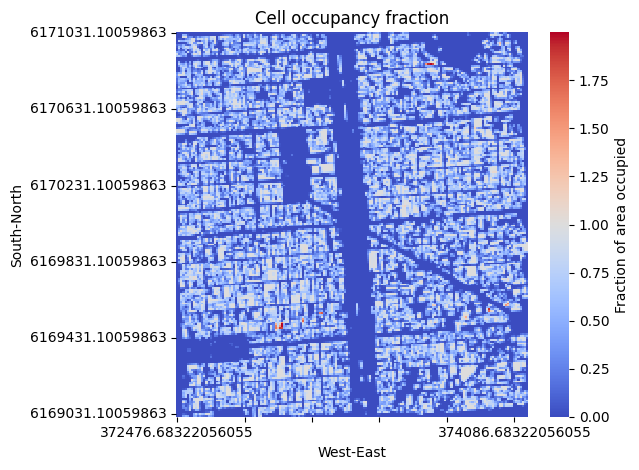

In [17]:
tools.plot_occupied_area_heatmap(intersections, area_center_x=area_center_x, area_center_y=area_center_y, save_as="test.png")

In [18]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

cell_composition
x_cell y_cell                                                   
-83     9      [{'polygon_tag': '48Q39JW5+RRRW', 'fraction_of...
        10     [{'polygon_tag': '48Q39JW5+RRRW', 'fraction_of...
        34     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...
        35     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...
        36     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...
...                                                          ...
 84    -10     [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...
       -9      [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...
       -8      [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...
       -7      [{'polygon_tag': '48Q39JWG+5WM3', 'fraction_of...
       -6      [{'polygon_tag': '48Q39JWG+5WM3', 'fraction_of...

[24723 rows x 1 columns]

In [19]:
cell_composition.iloc[20].values 

array([list([{'polygon_tag': '48Q3CJ25+XQHF', 'fraction_of_buildings_in_cell': 0.08892290184041948, 'fraction_of_the_building': 0.013461887817389977, 'area': 1.3560726892998543}, {'polygon_tag': '48Q3CJ25+WQGG', 'fraction_of_buildings_in_cell': 0.9110770981595806, 'fraction_of_the_building': 0.18823784821218073, 'area': 13.893909725055611}])],
      dtype=object)

In [20]:
cell_composition = tools.add_orientation_to_cells(cell_composition, subset)
cell_composition

100%|██████████| 24723/24723 [00:40<00:00, 612.29it/s]


cell_composition  \
x_cell y_cell                                                      
-83     9      [{'polygon_tag': '48Q39JW5+RRRW', 'fraction_of...   
        10     [{'polygon_tag': '48Q39JW5+RRRW', 'fraction_of...   
        34     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...   
        35     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...   
        36     [{'polygon_tag': '48Q39JX5+QQF8', 'fraction_of...   
...                                                          ...   
 84    -10     [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...   
       -9      [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...   
       -8      [{'polygon_tag': '48Q39JWG+2WQM', 'fraction_of...   
       -7      [{'polygon_tag': '48Q39JWG+5WM3', 'fraction_of...   
       -6      [{'polygon_tag': '48Q39JWG+5WM3', 'fraction_of...   

               orientation_angle  eccentricity  
x_cell y_cell                                   
-83     9               5.046740      0.542407  
        10              5.046740      0.542407  
        34             88.895136      0.939630  
        35             88.895136      0.939630  
        36             88.895136      0.939630  
...                          ...           ...  
 84    -10              9.755924      0.202537  
       -9               9.755924      0.202537  
       -8               4.981812      0.535338  
       -7               4.981546      0.535428  
       -6               4.981546      0.535428  

[24723 rows x 3 columns]

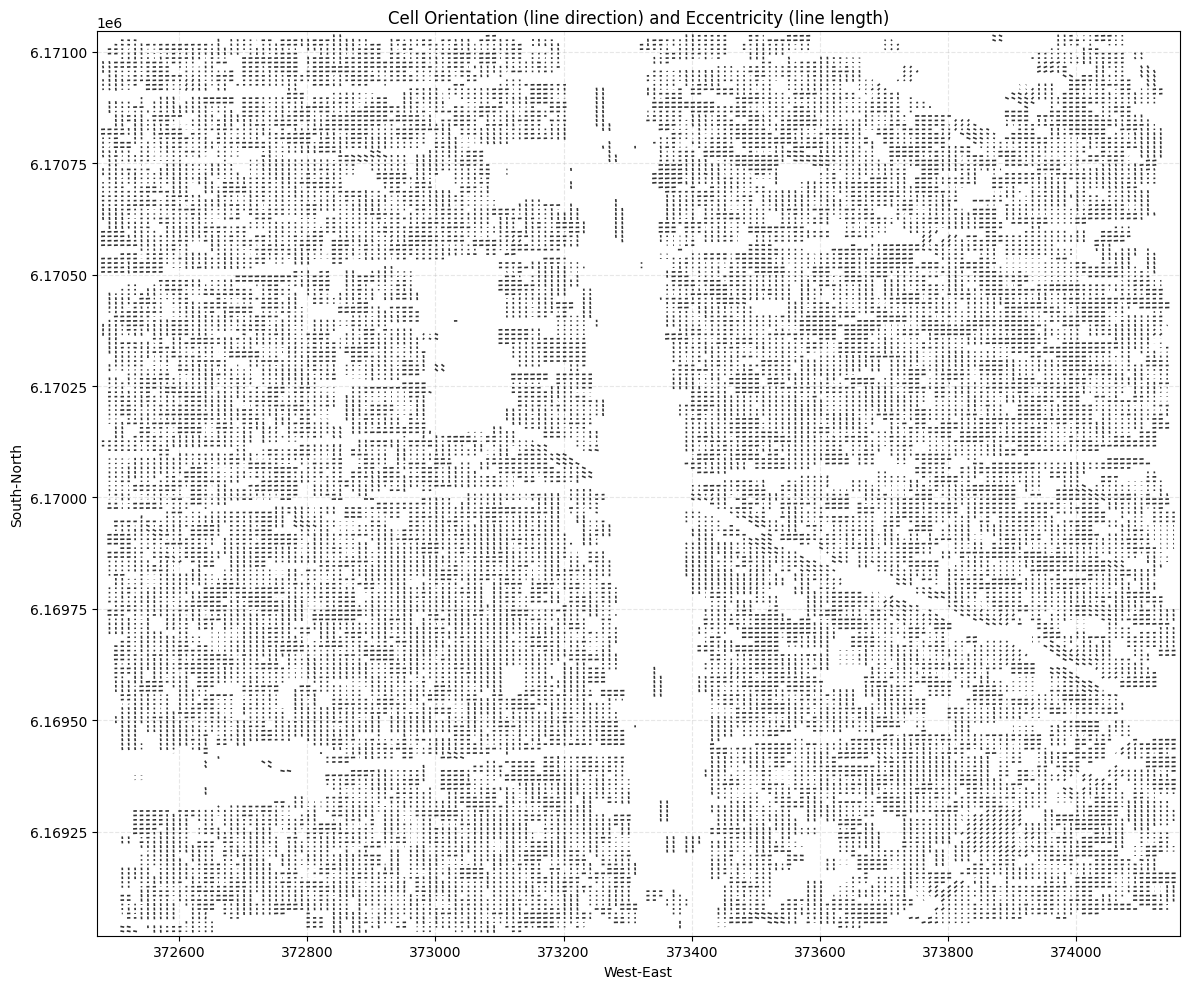

In [21]:
tools.plot_orientation_lines(cell_composition, area_center_x=area_center_x, area_center_y=area_center_y, save_as="test_orientation.png")

In [ ]:
# Now we will save all outputs into geojson files
